In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import pickle
import time
import glob,os
from scipy.io import loadmat
from scipy.spatial import ConvexHull, convex_hull_plot_2d, Delaunay
def in_hull(p,H1,H2):
    if H1.find_simplex(p)>=0 and H2.find_simplex(p)<0:
        return True
    else:
        return False

rollout = 0

comp = 'szhang'
Set = '19c_zstest'
set_modes = ['astar']


Running pickle file: /Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/rollout_node/set/set19c_zstest/astar_goal0_run0_m100_obs0.75_plan.pkl
Obstacle size 0.75; Goal Number 0, with center: [-66  80]
Plotting file number 1: astar_goal0_run0_m100_obs0.75_plan
Finished episode success rate: 40.0%
Planned path steps: 894, failure path steps: 701.0
Reached goal success rate: 0.0%
Success path last distance to goal: 13.402460928643983mm, failure path last distance to goal: 23.304616925520854mm.
Error: 10.762364936275032mm, plan path length: 75.10005066476508mm, success path length: 101.76797209006912mm, failure path length: 76.65496441955423mm.

Running pickle file: /Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/rollout_node/set/set19c_zstest/astar_goal15_run0_m100_obs1.5_plan.pkl

Running pickle file: /Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/rollout_node/set/set19c_zstest/astar_goal15_run0_m100_obs3_plan.pkl

Running pickle file: /Users/zsbjltwjj/Downloads/t42

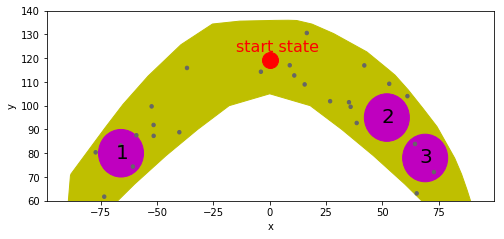

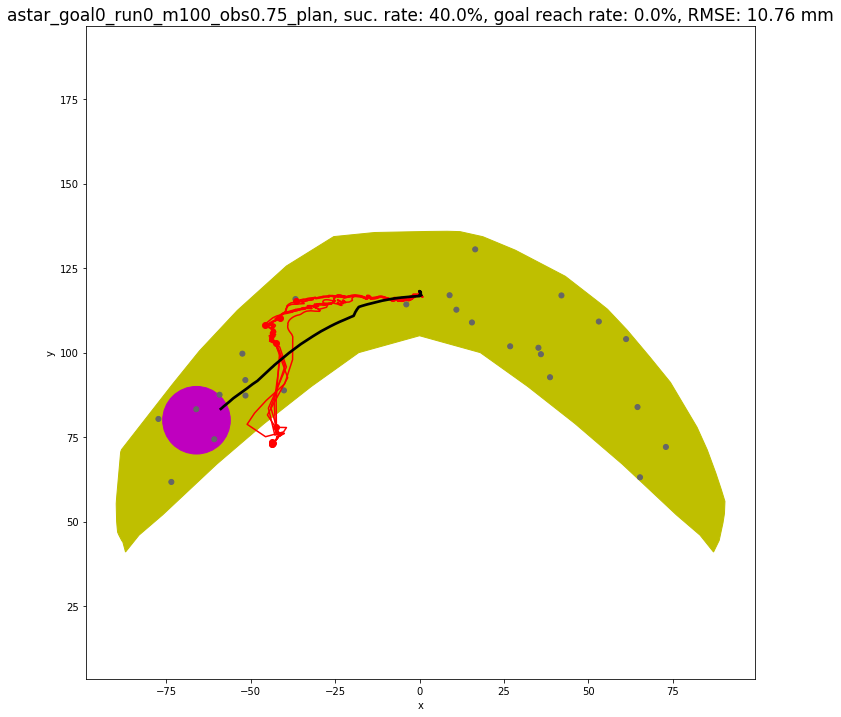

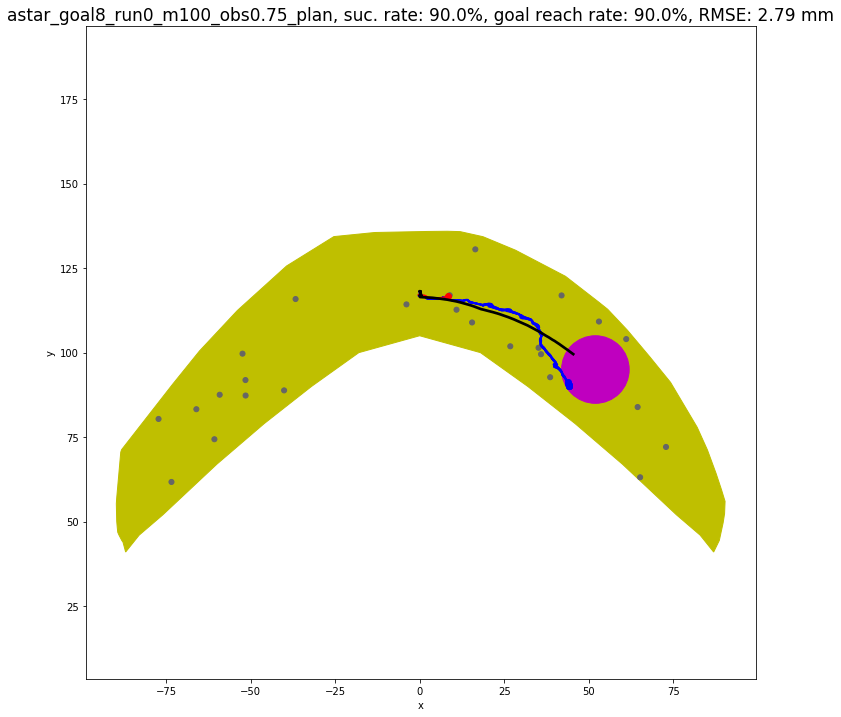

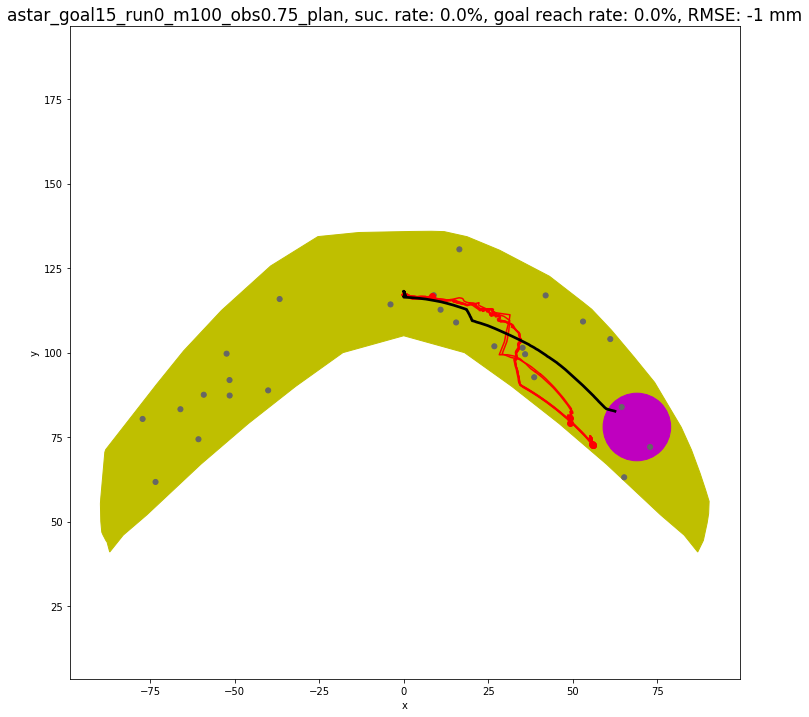

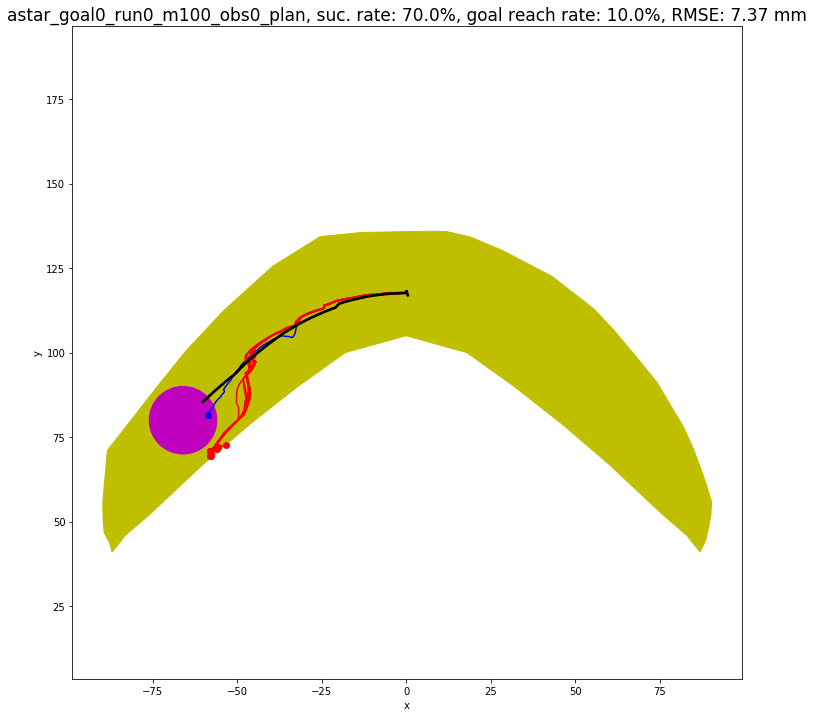

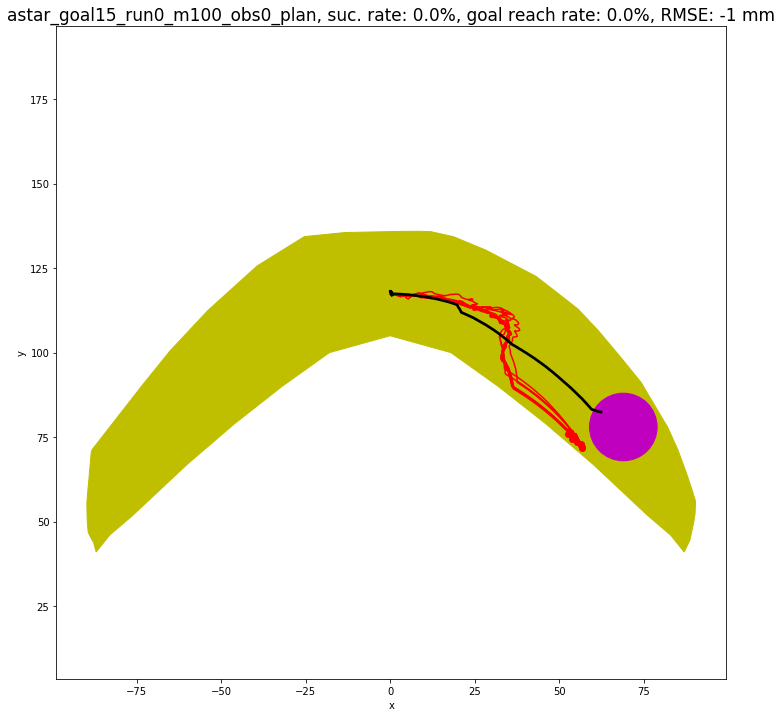

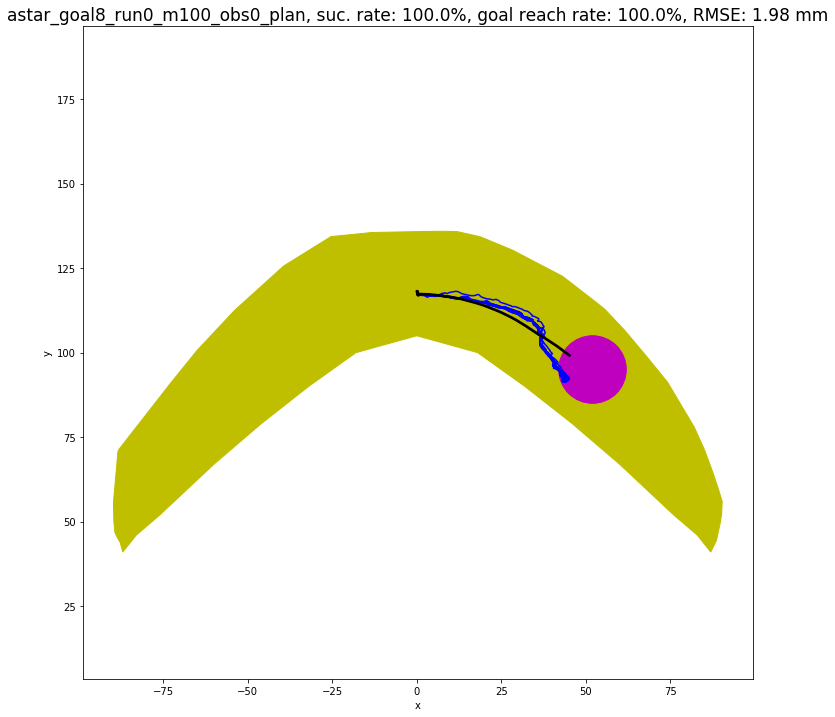

In [3]:
############################# Rollout ################################
if rollout:

    import rospy
    from std_srvs.srv import Empty, EmptyResponse
    from rollout_node.srv import rolloutReq

    rollout_srv = rospy.ServiceProxy('/rollout/rollout', rolloutReq)
    rospy.init_node('run_rollout_set', anonymous=True)
    state_dim = 4

    
    for set_mode in set_modes:
        path = '/home/' + comp + '/catkin_ws/src/beliefspaceplanning/rollout_node/set/set' + Set + '/'
        files = glob.glob(path + set_mode + "*.txt")
        files_pkl = glob.glob(path + set_mode + "*.pkl")

        if len(files) == 0:
            continue
        for i in range(len(files)):
            action_file = files[i]
            if action_file.find('traj') > 0:
                continue
            if any(action_file[:-3] + 'pkl' in f for f in files_pkl):
                continue
            pklfile = action_file[:-3] + 'pkl'

            # To distribute rollout files between computers
            ja = pklfile.find('goal')+4
            jb = ja + 1
            while not (pklfile[jb] == '_'):
                jb += 1
            num = int(pklfile[ja:jb])
            jc = pklfile.find('obs')+3
            obs_size = float(pklfile[jc:-9])
            jd = pklfile.find('run')+3         
            je = jd + 1
            while not (pklfile[je] == '_'):
                je += 1
            run_idx = int(pklfile[jd:je])

            print('Rolling-out goal number ' + str(num) + ', run index ' + str(run_idx) + ', obstacle size ' + str(obs_size) + ': ' + action_file + '.')

            try:
                A = np.loadtxt(action_file, delimiter=',', dtype=float)[:,:2]
            except: 
                A = np.loadtxt(action_file, delimiter=',', dtype=float)
                print(A.shape)

            Af = A.reshape((-1,))
            Pro = []
            for j in range(10):
                print("Rollout number " + str(j) + ".")
                Sro = np.array(rollout_srv(Af, [0,0,0,0],[obs_size]).states).reshape(-1,state_dim)                    
                Pro.append(Sro)
                with open(pklfile, 'wb') as f: 
                    pickle.dump(Pro, f)

############################# Evaluation ################################
else:
    if Set.find('19c') >= 0:
        C = np.array([[-66, 80],
         [-41, 100], 
         [-62, 96], 
         [-49, 86], 
         [-55, 92],
         [59, 78],
         [31, 102],
         [60, 100],
         [52, 95],
         [-78, 67],
         [31, 125],
         [-26, 125],
         [0, 107],
         [3, 130],
         [-48, 114],
         [69, 78],
         ])

        if 0:
            np.random.seed(170)
            n = 60
            Obs = np.concatenate((np.random.random(size=(n,1))*160-80, np.random.random(size=(n,1))*95+50, 0.75*np.ones((n,1))), axis=1)
            with open('/home/pracsys/catkin_ws/src/beliefspaceplanning/rollout_node/set/obs_19.pkl', 'wb') as f: 
                pickle.dump(Obs, f)
        else:
            with open('/Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/rollout_node/set/obs_19.pkl', 'rb') as f: 
                Obs = pickle.load(f,encoding='latin')

    fig, ax = plt.subplots(figsize=(8,3.5))
    H1=np.array([[ 88.67572021,  44.43453217],
        [ 89.80430603,  49.65908432],
        [ 90.23077393,  52.36616516],
        [ 90.37576294,  55.98774719],
        [ 89.2946167 ,  59.5026474 ],
        [ 87.69602966,  64.31713104],
        [ 85.16108704,  71.19532013],
        [ 82.13684845,  77.89694977],
        [ 74.24691772,  91.19889069],
        [ 68.09080505,  98.77561188],
        [ 61.46546173, 106.65620422],
        [ 55.63877487, 112.83303833],
        [ 53.02430725, 114.92677307],
        [ 43.14427567, 122.59031677],
        [ 43.12343216, 122.6015625 ],
        [ 28.351017  , 130.32281494],
        [ 18.74747467, 134.30844116],
        [ 11.96526051, 135.81428528],
        [  8.20428085, 135.91555786],
        [  2.36519504, 135.85865784],
        [-13.29637909, 135.5484314 ],
        [-25.39010048, 134.3369751 ],
        [-39.37775421, 125.64316559],
        [-53.93115997, 112.47859192],
        [-65.12301636, 100.51941681],
        [-73.16171265,  90.56554413],
        [-88.19309998,  71.29073334],
        [-88.44422913,  70.54364777],
        [-89.6594696 ,  56.80038452],
        [-89.75466156,  55.28162766],
        [-89.63751221,  50.12192154],
        [-89.49487305,  48.43606567],
        [-89.34468079,  46.8845253 ],
        [-89.0162735 ,  46.1090126 ],
        [-88.13287354,  44.4129982 ],
        [-87.78145599,  43.91517639]])
    H2 = np.array([[-87,41],[-83,46],[-76,52],[-60,67],[-46,79],[-32,90],[-18,100],[0,105],[18,100],[32,90],[46,79],[60,67],[76,52],[83,46],[87,41]])
    H1D=Delaunay(H1)
    H2D=Delaunay(H2)
    H = np.concatenate((np.array(H1)[:,:], H2), axis=0)
    pgon = plt.Polygon(H, color='y', alpha=1, zorder=0)
    ax.add_patch(pgon)

    #idx = [0, 7, 8, 15, 2]
    idx = [0, 8, 15]

    j = 1
    #r=8.
    r=10.
    for i in idx:
        ctr = C[i]
        goal_plan = plt.Circle((ctr[0], ctr[1]), r, color='m')
        ax.add_artist(goal_plan)
        plt.text(ctr[0]-2.5, ctr[1]-2, str(j), fontsize=20)
        j += 1
    for o in Obs:
        if in_hull(np.array(o[:2]),H1D,H2D):
            obs = plt.Circle(o[:2], o[2], color=[0.4,0.4,0.4])#, zorder=10)
            ax.add_artist(obs)
    
    plt.plot(0, 119, 'ok', markersize=16, color ='r')
    plt.text(-15, 123, 'start state', fontsize=16, color ='r')
    plt.ylim([60, 140])
    plt.xlabel('x')
    plt.ylabel('y')
    results_path='/Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/rollout_node/set/set'+Set+'/results/'
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    plt.savefig(results_path+'GOAL_LOCATIONS.png', dpi=200)


    # ==============================Statistics Evaluation=================
    evaluation=1

    def tracking_error(S1, S2, Pro_fail):
        if type(S1)!=str:
            if S1.shape[0]!=S2.shape[0]:
                raise ValueError('Success rollout path does not have the same path length as plan path.')
            else:
                Sum = 0.
                for s1, s2 in zip(S1, S2):
                    Sum += np.linalg.norm(s1[:2]-s2[:2])**2
                l,l_ro = 0.,0.
                for i in range(1,S2.shape[0]):
                    l += np.linalg.norm(S2[i,:2] - S2[i-1,:2])
                    l_ro += np.linalg.norm(S1[i,:2] - S1[i-1,:2])
                if len(Pro_fail)!=0:
                    l_ro_fail_ls=[]
                    for S_fail in Pro_fail:
                        l_ro_fail=0
                        for i in range(1,S_fail.shape[0]):
                            l_ro_fail += np.linalg.norm(S_fail[i,:2] - S_fail[i-1,:2])
                        l_ro_fail_ls.append(l_ro_fail)
                    return np.sqrt(Sum / S1.shape[0]), l, l_ro, np.mean(l_ro_fail_ls)
                else:
                    return np.sqrt(Sum / S1.shape[0]), l, l_ro, -1
        else:
            l=0.
            for i in range(1,S2.shape[0]):
                l += np.linalg.norm(S2[i,:2] - S2[i-1,:2])
            l_ro_fail_ls=[]
            for S_fail in Pro_fail:
                l_ro_fail=0
                for i in range(1,S_fail.shape[0]):
                    l_ro_fail += np.linalg.norm(S_fail[i,:2] - S_fail[i-1,:2])                    
                l_ro_fail_ls.append(l_ro_fail)
            return -1,l,-1,np.mean(l_ro_fail_ls)

    def calc_last_dist_to_goal(Pro_suc,Pro_fail,goal_loc):
        suc_last_dist,fail_last_dist=[],[]
        if len(Pro_suc)>0:
            for i in Pro_suc:
                suc_last_dist.append(np.linalg.norm(i[-1,:2]-goal_loc))
        else:
            suc_last_dist=[-1]
        if len(Pro_fail):
            for i in Pro_fail:
                fail_last_dist.append(np.linalg.norm(i[-1,:2]-goal_loc))
        else:
            fail_last_dist=[-1]
        return np.mean(suc_last_dist),np.mean(fail_last_dist)

    #rp = 5.0
    #r = 8.
    #r = 10.
    #Pc = []
    #Acc = []
    Pastar = []
    Acastar = []

    if evaluation:
        #obs_sizes=[0,0.75,1.5,3]
        obs_sizes=['0','0.75']
        new_C=[]
        for i in idx:
            new_C.append(C[i])
        new_C=np.array(new_C)

        Sum = {set_mode: np.zeros((len(obs_sizes)*new_C.shape[0],10)) for set_mode in set_modes} 
        # run_num = 0

        for set_mode in set_modes:
            planner = set_mode

            path = '/Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/rollout_node/set/set' + Set + '/'

            fo  = open(results_path + set_mode + '.txt', 'wt') 

            files = glob.glob(path + "*.pkl")

            for k in range(len(files)):

                pklfile = files[k]
                if pklfile.find('traj') > 0:
                    continue
                if pklfile.find(set_mode) < 0:
                    continue
                print("\nRunning pickle file: " + pklfile)
                
                ja = pklfile.find('goal')+4
                jb = ja + 1
                while not (pklfile[jb] == '_'):
                    jb += 1
                num = int(pklfile[ja:jb])
                if num not in idx:
                    continue
                goal_idx=idx.index(num)
                jc = pklfile.find('obs')+3
                obs_size = pklfile[jc:-9]
                if obs_size not in obs_sizes:
                    continue
                obs_idx = obs_sizes.index(pklfile[jc:-9])
                jd = pklfile.find('run')+3         
                je = jd + 1
                while not (pklfile[je] == '_'):
                    je += 1
                run_idx = int(pklfile[jd:je])
                try:
                    ctr = C[num, :] # Goal center
                except:
                    ctr = np.array([0,0])
                    raise ValueError('Goal Index Not Found!')
               #print(("Goal number %d with center: "%num), ctr)
                print('Obstacle size ' + str(obs_size) + '; Goal Number ' + str(num) + ', with center:', ctr)

                for j in range(len(pklfile)-1, 0, -1):
                    if pklfile[j] == '/':
                        break
                file_name = pklfile[j+1:-4]

                trajfile = pklfile[:-8] + 'traj.txt'
                Straj = np.loadtxt(trajfile, delimiter=',', dtype=float)[:,:2]
                print('Plotting file number ' + str(k+1) + ': ' + file_name)
                with open(pklfile,'rb') as f:  
                    Pro = pickle.load(f,encoding='latin')
                A = np.loadtxt(pklfile[:-3] + 'txt', delimiter=',', dtype=float)[:,:2]


                plan_path_steps = Straj.shape[0]
                #maxX = np.max([x.shape[0] for x in Pro])
                c = np.sum([(1 if x.shape[0]==plan_path_steps else 0) for x in Pro])
                c = float(c) / len(Pro)*100
                print("Finished episode success rate: " + str(c) + "%")
                #e = np.zeros((plan_path_steps, 1))
                Pro_suc, Pro_fail = [],[]
                for S in Pro:
                    #if not (S.shape[0] > maxR-20):
                    #    continue
                    #Pro_suc.append(S)
                    if S.shape[0]==plan_path_steps:
                        Pro_suc.append(S)
                    else:
                        Pro_fail.append(S)
                for kk in range(len(Pro_fail)):
                    S = Pro_fail[kk]
                    ii = S.shape[0]-1
                    while np.linalg.norm(S[ii,:2]-S[ii-1,:2]) > 5:
                        ii -= 1
                    Pro_fail[kk] = S[:ii+1]
                if len(Pro_fail)!=0:
                    fail_path_steps = np.mean([i.shape[0] for i in Pro_fail])
                else:
                    fail_path_steps = -1
                print("Planned path steps: "+str(plan_path_steps)+", failure path steps: "+str(fail_path_steps))


                fig, ax = plt.subplots(figsize=(12,12))
                pgon = plt.Polygon(H, color='y', alpha=1, zorder=0)
                ax.add_patch(pgon)
                for kk in range(len(Pro)):
                    S = Pro[kk]
                    if S.shape[0] < plan_path_steps:
                        ii = S.shape[0]-1
                        while np.linalg.norm(S[ii,:2]-S[ii-1,:2]) > 5:
                            ii -= 1
                        Pro[kk] = S[:ii+1]
                p = 0
                for S in Pro:
                    if np.linalg.norm(S[-1,:2]-ctr) > r:
                        plt.plot(S[:,0], S[:,1], '-r')
                        plt.plot(S[-1,0], S[-1,1], 'or')
                    else:
                        #if set_mode == 'robust_particles_pc' and num == 0:
                        #    plt.plot(S[-8,0], S[-8,1], 'ob')
                        #    plt.plot(S[:-7,0], S[:-7,1], '-b')
                        #else:
                        plt.plot(S[-1,0], S[-1,1], 'ob')
                        plt.plot(S[:,0], S[:,1], '-b')
                        p += 1
                p = float(p) / len(Pro)*100
                print("Reached goal success rate: " + str(p) + "%")
                if Set.find('10c') >= 0 or Set.find('11c') >= 0:
                    import matplotlib.patches as patches
                    goal_plan = patches.Rectangle((70, 38), 20, 65, color='m')
                    ax.add_artist(goal_plan)
                    goal_plan = patches.Rectangle((-70-20, 38), 20, 65, color='m')
                    ax.add_artist(goal_plan)
                else:
                    goal_plan = plt.Circle((ctr[0], ctr[1]), r, color='m')
                    ax.add_artist(goal_plan)
                try:
                    for o in Obs:
                        if in_hull(np.array(o[:2]),H1D,H2D):
                            obs = plt.Circle(o[:2], float(obs_size), color=[0.4,0.4,0.4])#, zorder=10)
                            ax.add_artist(obs)
                except:
                    pass
                
                suc_last_dist,fail_last_dist=calc_last_dist_to_goal(Pro_suc,Pro_fail,ctr)
                if suc_last_dist!=-1:
                    suc_last_dist=suc_last_dist-r
                if fail_last_dist!=-1:
                    fail_last_dist=fail_last_dist-r
                print("Success path last distance to goal: "+str(suc_last_dist)+"mm, failure path last distance to goal: "+str(fail_last_dist)+"mm.")
                #print Smean.shape, Straj.shape
                Smean = []
                Sstd = []
                if len(Pro_suc) > 0:
                    for i in range(plan_path_steps):
                        F = []
                        for j in range(len(Pro_suc)): 
                            F.append(Pro_suc[j][i])
                        Smean.append( np.mean(np.array(F), axis=0) )
                        Sstd.append( np.std(np.array(F), axis=0) )
                    Smean = np.array(Smean)
                    Sstd = np.array(Sstd)
                    e, l, l_ro, l_ro_fail = tracking_error(Smean, Straj,Pro_fail)
                else:
                    e, l, l_ro, l_ro_fail = tracking_error('no_suc', Straj,Pro_fail)
                print("Error: " + str(e) + 'mm, plan path length: ' + str(l) + 'mm, success path length: ' + str(l_ro) + 'mm, failure path length: ' + str(l_ro_fail) + "mm.")
                
                #Sum[planner][num, 4] += 1
                #if p >= Sum[planner][num, 1] and (Sum[planner][num, 2] == 0 or Sum[planner][num, 2] > e):
                loc=len(idx)*obs_idx+goal_idx
                loc=len(obs_sizes)*goal_idx+obs_idx
                Sum[planner][loc, 0] = c # Success rate percent
                Sum[planner][loc, 1] = p # Goal Reach rate percent
                Sum[planner][loc, 2] = round(l, 2) # Planned path length
                Sum[planner][loc, 3] = round(l_ro, 2) # Success path length
                Sum[planner][loc, 4] = round(l_ro_fail, 2) # Failure path length
                Sum[planner][loc, 5] = plan_path_steps # Plan path steps
                Sum[planner][loc, 6] = fail_path_steps # Failure path steps
                Sum[planner][loc, 7] = suc_last_dist # Success path last distance to goal
                Sum[planner][loc, 8] = fail_last_dist # Failure path last distance to goal
                Sum[planner][loc, 9] = round(e, 2) # Success path RMSE relative to plan path

                plt.plot(Straj[:,0], Straj[:,1], '-k', linewidth = 2.7, label='Planned path')
                plt.title(file_name + ", suc. rate: " + str(c) + "%, " + "goal reach rate: " + str(p) + "%, RMSE: " + str(round(e, 2)) + ' mm', fontsize = 17)
                plt.axis('equal')

                if 1:# num == 0:
                    if set_mode=='astar':
                        Pastar.append(p)
                        Acastar.append(e)
                    #if set_mode == 'naive_goal':
                    #    Pn.append(p)
                    #    Acn.append(e)
                    #if set_mode == 'naive_withCriticCost':
                    #    Pc.append(p)
                    #    Acc.append(e)

                for i in range(len(pklfile)-1, 0, -1):
                    if pklfile[i] == '/':
                        break
                fo.write(pklfile[i+1:-4] + ': ' + str(c) + ', ' + str(p) + '\n')
                plt.ylim([60, 140])
                plt.xlabel('x')
                plt.ylabel('y')
                plt.savefig(results_path + '/' + pklfile[i+1:-4] + '.png', dpi=200)
                #plt.show()
            fo.close()
        # plt.show()

        ################# Summary #################
        def convert_to_goal_and_obs(loc,idx,obs_sizes):
            #goal_idx=loc % len(idx)
            #obs_idx=loc //  len(idx)
            goal_idx=loc // len(obs_sizes)
            obs_idx=loc %  len(obs_sizes)
            return idx[goal_idx],obs_sizes[obs_idx]

        download_dir = results_path + '/summary.csv' 
        csv = open(download_dir, "w") 
        csv.write("Goal #,Obstacle Size,")
        for key in Sum.keys():
            for _ in range(Sum[key].shape[1]):
                csv.write(key + ',')
        csv.write('\n')
        csv.write(',,')
        for key in Sum.keys():
            csv.write('success rate, goal reach rate, plan path length, success path length, failure path length, plan path steps, failure path steps, success path last distance to goal, failure path last distance to goal, success path RMSE relative to plan path,')
        csv.write('\n')
        for loc in range(len(obs_sizes)*len(idx)):
            goal,obs_size=convert_to_goal_and_obs(loc,idx,obs_sizes)
            csv.write(str(goal) + ',')
            csv.write(obs_size + ',')
            for key in Sum.keys():
                for j in range(Sum[key].shape[1]):
                    if Sum[key][loc, j]==-1:
                        csv.write('-,')
                    else:
                        csv.write(str(Sum[key][loc, j]) + ',')
            csv.write('\n')

        print("Astar: ")
        print("Mean success rate: ", np.mean(np.array(Pastar)))
        print("Mean error: ", np.mean(np.array(Acastar)))
        #print "Naive: "
        #print "Mean success rate: ", np.mean(np.array(Pn))
        #print "Mean error: ", np.mean(np.array(Acn))
        #print "Critic: "
        #print "Mean success rate: ", np.mean(np.array(Pc))
        #print "Mean error: ", np.mean(np.array(Acc))

